<a href="https://colab.research.google.com/github/mmistroni/OpenBB_Experiments/blob/main/OpenBBFinancialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the OpenBB Platform in Google Colab

This notebook will install the OpenBB Platform, fetch some data and prepare it for display as a bar chart.

Sign up for a free account here: https://my.openbb.co

In [1]:
# Install the OpenBB Platform with all available extensions.
# Messages indicating package version conflicts at the end of installation can be safely ignored.

!pip install openbb[all]

# There is also a nightly distribution available, openbb-nightly

In [2]:
# Before running this cell, restart the runtime by selecting, "Restart runtime", from the "Runtime" menu.

# Import statements - for many scenarios, the only import needed will be `from openbb import obb`
from typing import Literal
from IPython.display import display
from IPython.display import clear_output
import ipywidgets as widgets
import pandas as pd
import pandas_ta as ta
from datetime import datetime , date
from plotly import graph_objects as go

from openbb import obb

Extensions to add: stockgrid@1.1.0, quantitative@1.1.0, ecb@1.1.0, openbb_charting@1.1.0, seeking_alpha@1.1.0, econometrics@1.1.0, technical@1.1.0, biztoc@1.1.0, cboe@1.1.0, nasdaq@1.1.1, alpha_vantage@1.1.0, government_us@1.1.0, yfinance@1.1.0

Building...


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

def get_openbb_keys():
  with open('gdrive/My Drive/passwords/openbb.keys') as f:
    return f.readlines()[0]

def getfmpkeys():
  with open('gdrive/My Drive/passwords/fmprep.keys') as f:
    return f.readlines()[0]


Mounted at /content/gdrive


In [4]:
# Login to OpenBB Hub to retrieve stored API keys.
# https://my.openbb.co/app/platform/pat
# https://my.openbb.co/app/platform/api-keys

obb.account.login(pat=get_openbb_keys())

In [5]:
# Verify that the credentials from Hub were loaded successfully.


obb.user.preferences.output_type = "dataframe"
obb.user.credentials

Credentials

alpha_vantage_api_key: None
benzinga_api_key: None
biztoc_api_key: None
fmp_api_key: **********
fred_api_key: **********
intrinio_api_key: None
nasdaq_api_key: None
polygon_api_key: None
tiingo_token: None
tradingeconomics_api_key: None

### Defining Tickers for Analysis


In [6]:
# Set the output preference, if desired. The examples below use Pandas DataFrames.
from datetime import timedelta
from dateutil.relativedelta import relativedelta
TICKER = 'DIS'
TICKER2 = '^GSPC' # S&P500
SECTOR_TICKER = 'XLY'
INDUSTRY_TICKER = 'XME'
startDate = date.today() - relativedelta(years=5)

### Return Comparison

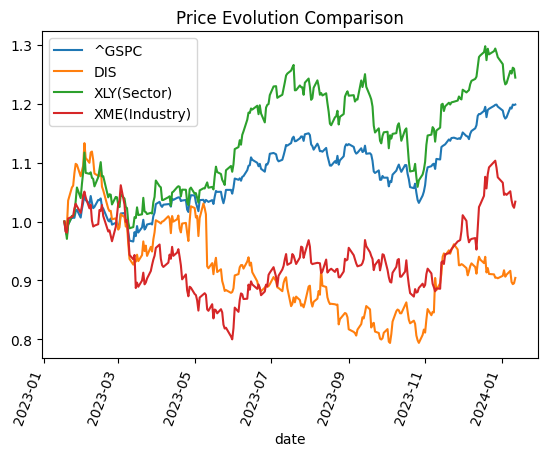

In [7]:
obb.equity.price.historical(symbol = 'AAPL', provider='fmp')
import matplotlib.pyplot as plt
spy = obb.equity.price.historical(symbol = TICKER2, provider='fmp')[['close']].rename(columns={'close' : TICKER2})
dis = obb.equity.price.historical(symbol = TICKER, provider='fmp')[['close']].rename(columns={'close' : TICKER})
sector = obb.equity.price.historical(symbol = SECTOR_TICKER, provider='fmp')[['close']].rename(columns={'close' : SECTOR_TICKER})
industry = obb.equity.price.historical(symbol = INDUSTRY_TICKER, provider='fmp')[['close']].rename(columns={'close' : INDUSTRY_TICKER})

one = pd.merge(spy, dis, left_index=True, right_index=True)
two = pd.merge(one, sector,left_index=True, right_index=True)
result = pd.merge(two, industry,left_index=True, right_index=True)
histpriceconcat = result/result.iloc[0]


for i, col in enumerate([TICKER2, TICKER, SECTOR_TICKER, INDUSTRY_TICKER]):
    histpriceconcat[col].plot()

plt.title('Price Evolution Comparison')
plt.xticks(rotation=70)

legendCols = [TICKER2, TICKER, f'{SECTOR_TICKER}(Sector)', f'{INDUSTRY_TICKER}(Industry)']

plt.legend(legendCols)
#plt.savefig('foo1.png', bbox_inches='tight')
#
plt.show()


### Overview

In [8]:
obb.equity.fundamental.overview(symbol=TICKER)

,0,1
0,symbol,DIS
1,price,90.35
2,beta,1.352
3,vol_avg,12479695
4,mkt_cap,165369412000
5,last_div,0.6
6,range,78.73-118.18
7,changes,0.9
8,company_name,The Walt Disney Company
9,currency,USD


### Stock Peers

In [9]:
import os
import requests

def get_peers(ticker):
    apiKey = getfmpkeys()
    baseUrl = f'https://financialmodelingprep.com/api/v4/stock_peers?symbol={ticker}&apikey={apiKey}'
    return requests.get(baseUrl).json()[0].get('peersList', [])

full_tickers = obb.equity.compare.peers(symbol=TICKER)[1].values.tolist()[0]
full_tickers

['ROKU', 'AMC', 'PARA', 'WBD', 'NFLX', 'PARAA', 'APE']

### Generate comparative measures


### Ratios Overview

In [55]:
liq_ratios = ['current_ratio', 'quick_ratio', 'operating_cash_flow_per_share',  'days_of_sales_outstanding' ]
solvency_ratios = ['interest_coverage', 'debt_ratio',  'debt_equity_ratio'] #missing shareholder equity ratio
profitability_ratios = ['gross_profit_margin', 'operating_profit_margin',
                        #revenuePerShare
                        'pretax_profit_margin',
                        'net_profit_margin',
                        #Cash flow margin
                        'return_on_assets',
                        'return_on_equity',
                        'return_on_capital_employed',
                         #'price_to_sales_ratio'
                         ]

In [56]:
annual_ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="annual", limit=5)
quarterly_ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="quarter", limit=12)
quarterly_ratios['key'] = quarterly_ratios.apply(lambda row: f"{row['fiscal_period']}_{row['fiscal_year']}", axis=1)
# Income statement. we need this for trajectory of fundamentals
annual_income = obb.equity.fundamental.income(symbol=TICKER, period="annual", limit=5)
quarterly_income = obb.equity.fundamental.income(symbol=TICKER, period="quarter", limit=12)
quarterly_income['key'] = quarterly_ratios.apply(lambda row: f"{row['fiscal_period']}_{row['fiscal_year']}", axis=1)



In [57]:
annual_liquidity = annual_ratios[liq_ratios + ['fiscal_year'] ].set_index('fiscal_year')
annual_solvency = annual_ratios[solvency_ratios + ['fiscal_year'] ].set_index('fiscal_year')
annual_profitability = annual_ratios[profitability_ratios + ['fiscal_year'] ].set_index('fiscal_year')
quarterly_liquidity = quarterly_ratios[liq_ratios + ['key'] ].set_index('key')
quarterly_solvency = quarterly_ratios[solvency_ratios + ['key'] ].set_index('key')
quarterly_profitability = quarterly_ratios[profitability_ratios + ['key'] ].set_index('key')

annual_income = annual_income.set_index('fiscal_year')
quarterly_income = quarterly_income.set_index('key')


### Liquidity Annnually and Quarterly

<Axes: title={'center': 'Liquidity Ratios qtr'}, xlabel='key'>

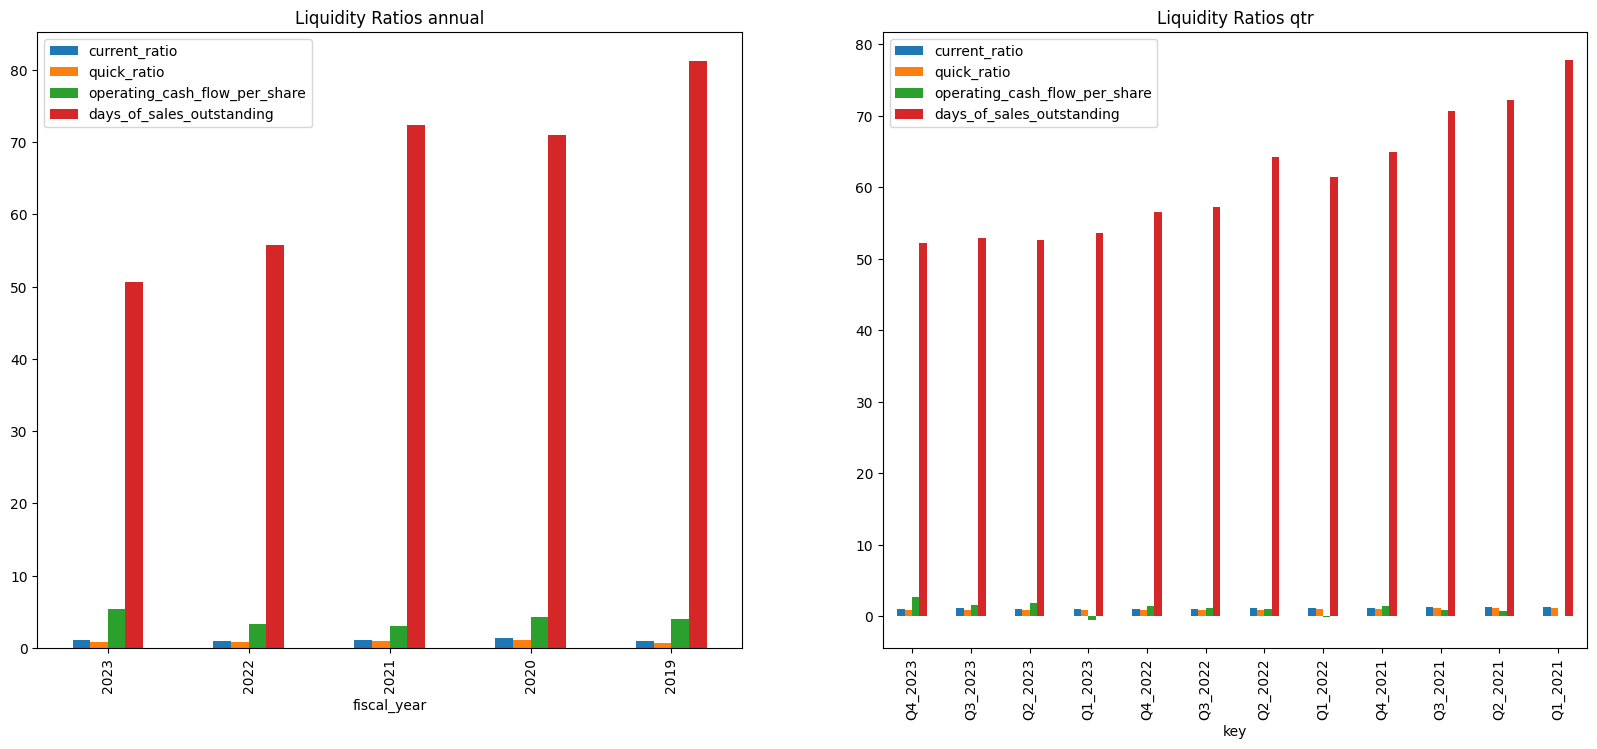

In [58]:
#annual_liquidity
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2)
annual_liquidity.apply(pd.to_numeric).plot.bar(figsize=(10,8), title='Liquidity Ratios annual', ax=axes[0])
quarterly_liquidity.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Liquidity Ratios qtr', ax=axes[1])

### Profitability

<Axes: title={'center': 'Profitability Ratios qtr'}, xlabel='key'>

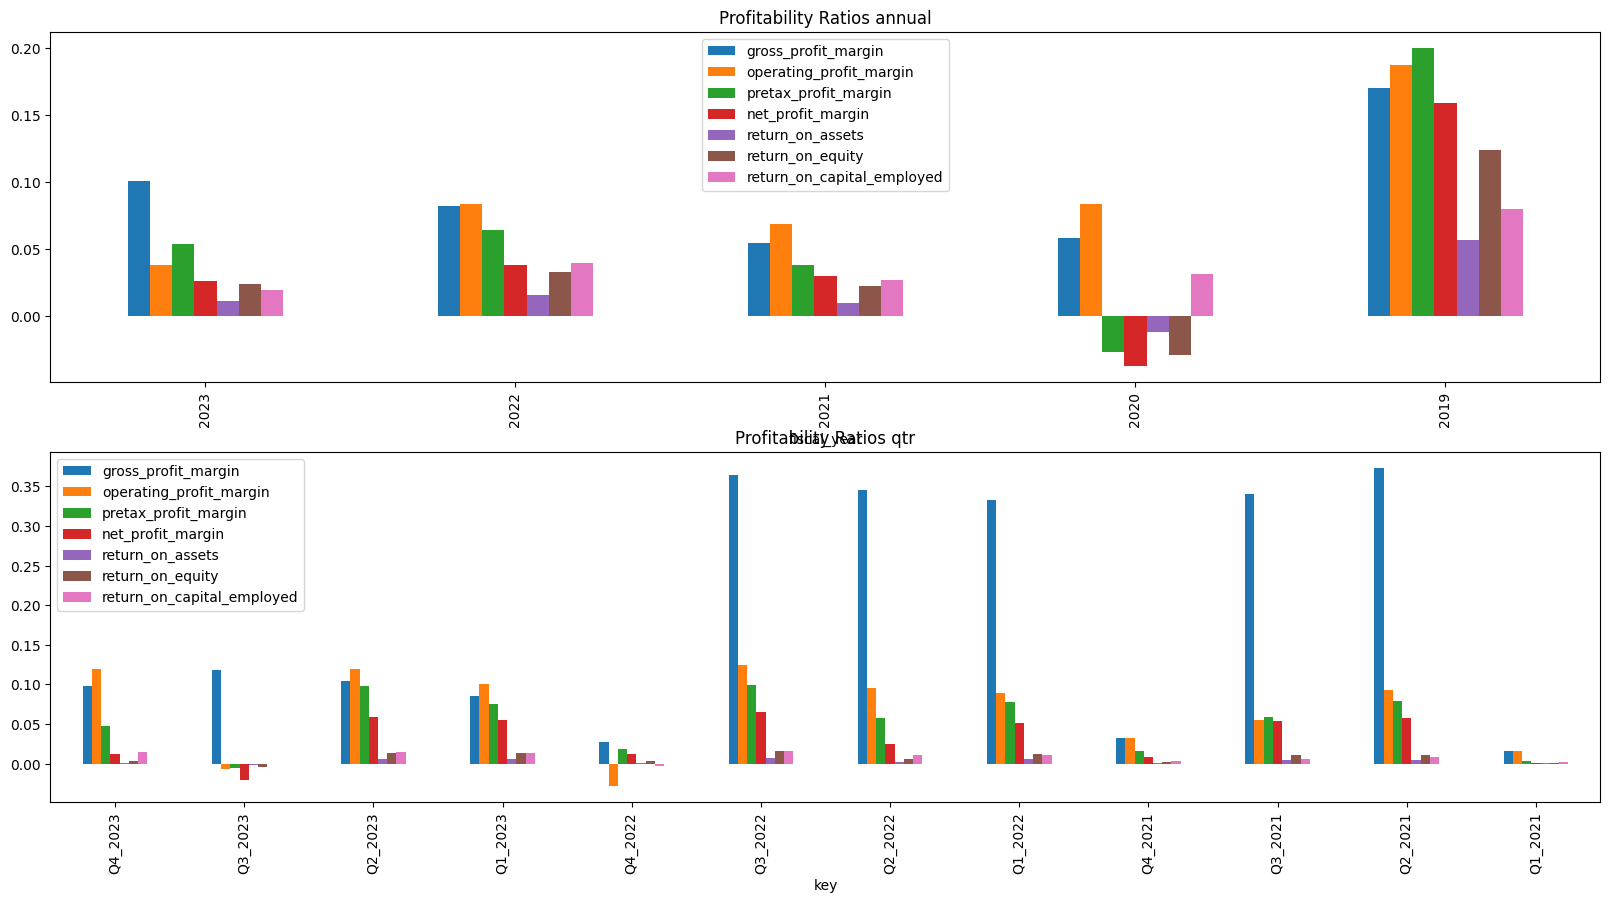

In [59]:
#annual_liquidity
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=1)
annual_profitability.apply(pd.to_numeric).plot.bar(figsize=(20, 10),title='Profitability Ratios annual', ax=axes[0])
quarterly_profitability.apply(pd.to_numeric).plot.bar(figsize=(20,10), title='Profitability Ratios qtr', ax=axes[1])

### Solvency

<Axes: title={'center': 'Solvency Ratios qtr'}, xlabel='key'>

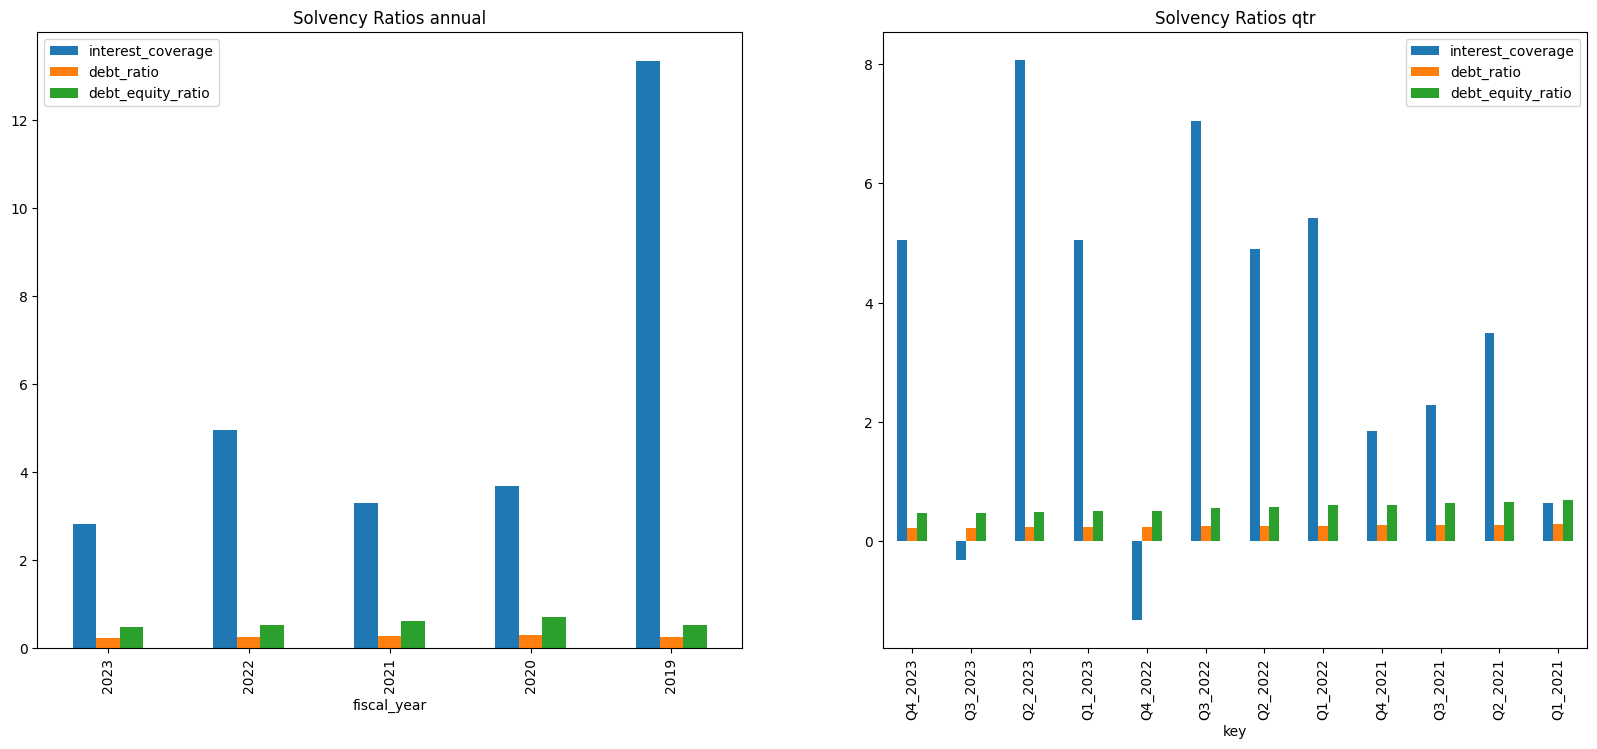

In [60]:
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2)
annual_solvency.apply(pd.to_numeric).plot.bar(figsize=(10,8), title='Solvency Ratios annual', ax=axes[0])
quarterly_solvency.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Solvency Ratios qtr', ax=axes[1])

### Now we will resort to the old analysis with Management, Profitability etc that we were used to do in colab

## Now Using other measures before checking financial statements in details

## TODO. follow https://colab.research.google.com/drive/1ZdGLqEfAXfiseahjIwxlRXgQbPg3-5Ol#scrollTo=LArvBJ9Qs9a2
COMPARE Across years

- check asset value (total assets, total liabilities, outstading shares, NAV
- compar across years priceearningration, priceearningtogrowthratio, earningyield
- net income, operating cf, capital expenditure, free cf, cashand cash equiv, year of cash


We are looking for htis

<ul>
    <li><b>Staying power</b>: You want to make sure a company has the financial resources to endure a downturn and come out on the other side.<li>
    <li><b>The trajectory of the fundamentals</b>: Because a stock price, over time, is connected to a company’s revenue and earnings, fundamental analysts try to see improving trends in the company’s revenue and profit. Trend spotting will be discussed at more length in Chapter 17.</li>
    <li><b>Evidence of skilled management</b>: A management team with experience navigating through the ups and downs of a business may give the fundamental analyst more confidence in the company’s future. Skilled managers can protect their company’s business from competition with strong brands, service, or quality.</li>
    <li><b>Valuation</b>: Even if a company is performing poorly, the stock can still be a good investment if the bad news is already reflected in the price. Fundamental analysts spend a great deal of their time comparing a company’s current stock price to its real value, based on what they think it’s worth. You discovered how to use the price-to-earnings ratio, or P-E, as a valuation tool in Chapter 8. In this chapter you’ll find out about the earnings yield. Fundamental analysts also look for good values using the discounted cash-flow model, explored in Chapter 11.</li>
    <li><b>Dividend payments</b>: These seemingly small cash payments can quickly add up and become a significant consideration for a fundamental analyst. Fundamental analysts also use these dividends as a way to measure the attractiveness of some stocks, as will be discussed at the end of this chapter.</li>
    </ul>
In addition, we might want to look at this. (Check what we already fetch from our superperformers loader)

<ol>
    <li>Financial Health:
        <ol>
<li>Revenue Growth Rate: Ideally, a company should have a positive revenue growth rate of at least 5% per year.</li>
<li>Profit Margin: A healthy profit margin varies by industry, but a company with a profit margin of at least 10% is generally considered financially healthy.</li>
<li>Debt-to-Equity Ratio: A ratio of less than 1 indicates that a company is financed more by equity than debt, which is generally considered financially healthy.</li>
<li>Free Cash Flow: A positive free cash flow indicates that a company is generating cash from its operations and is able to invest in growth opportunities.</li>
        </ol>
    </li>
 <li>Competitive Advantage:
    <ol>
<li>Market Share: A company with a market share of at least 20% is generally considered to have a strong competitive advantage in its industry.</li>
<li>Return on Equity: A healthy return on equity varies by industry, but a company with a return on equity of at least 15% is generally considered to have a strong competitive advantage.</li>
<li>Price-to-Earnings Ratio: A company with a price-to-earnings ratio that is lower than its peers may indicate that the company is undervalued and has a strong competitive advantage.</li>
<li>Research and Development (R&D) Spending: A company that invests at least 5% of its revenue in R&D is generally considered to be investing in innovation and maintaining its competitive advantage.</li>
     </ol>
  </li>
  <li>Management Quality:
    <ol>
<li>CEO Tenure: Ideally, a CEO should have been leading the company for at least 3–5 years to demonstrate a track record of success.</li>
<li>Executive Compensation: Executive compensation varies by industry, but excessive compensation may indicate poor management quality.</li>
<li>Employee Turnover Rate: A low employee turnover rate indicates that employees are satisfied and that the management team is effective at retaining talent.</li>
<li>Return on Assets: A healthy return on assets varies by industry, but a company with a return on assets of at least 5% is generally considered to have effective management.  </li>
      </ol>
    </li>
</ol>
    
    

### Fundamental Measures

In [78]:
skilled_management_measures = ['return_on_assets', 'return_on_equity', 'return_on_capital_employed']
staying_power_measures = idxs = ['return_on_capital_employed', 'current_ratio', 'debt_equity_ratio', 'interest_coverage', 'cash_per_share']
valuation_measures = ['price_earnings_to_growth_ratio', 'price_earnings_ratio']
profitability_measures = ["date", "revenue", "costOfRevenues", "operatingExpenses", # will need to probably get them from net income
              "otherExpenses", "netIncome", "ebitda", "interestExpense", "incomeTaxExpense",
              "operatingIncome"]
financial_rations_measures = ['return_on_equity', 'return_on_capital_employed',"receivablesTurnover",
              "inventoryTurnover", "payablesTurnover", "debt_equity_ratio",
              "current_ratio", "quick_ratio", "cash_ratio", "interest_coverage",
              "priceToBookRatio", "dividendYield", "dividendPayoutRatio", "priceEarningsRatio",
              "priceEarningsToGrowthRatio", "cashPerShare"]

trajectory_of_fundamentals = ['revenue', 'diluted_earnings_per_share', 'consolidated_net_income']
cashflow_measures = ['symbol', 'netIncome', "operatingCashFlow", "capitalExpenditure", "freeCashFlow", "ebtida"]
trend_measures = ['operatingIncome', 'revenues', 'eps', 'dividend']

# Find net asset value

In [79]:
ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="annual", limit=5)


,revenue,diluted_earnings_per_share,consolidated_net_income
fiscal_year,,,
2023,88898000000,1.29,2354000000
2022,82722000000,1.72,3145000000
2021,67418000000,1.09,1995000000
2020,65388000000,-1.35,-2442000000
2019,69570000000,6.64,11054000000


In [72]:
annual_income

,period_ending,fiscal_period,filing_date,accepted_date,reported_currency,revenue,cost_of_revenue,gross_profit,gross_profit_ratio,selling_general_and_admin_expense,...,income_before_tax_ratio,income_tax_expense,consolidated_net_income,net_income_ratio,basic_earnings_per_share,diluted_earnings_per_share,weighted_average_basic_shares_outstanding,weighted_average_diluted_shares_outstanding,link,final_link
fiscal_year,,,,,,,,,,,,,,,,,,,,,
2023,2023-09-30,FY,2023-11-21,2023-11-21 17:04:04,USD,88898000000,79906000000,8992000000,0.101150,NaN,...,0.053646,1379000000,2354000000,0.026480,1.29,1.29,1828000000,1830000000,https://www.sec.gov/Archives/edgar/data/174448...,https://www.sec.gov/Archives/edgar/data/174448...
2022,2022-10-01,FY,2022-11-29,2022-11-29 17:03:15,USD,82722000000,75952000000,6770000000,0.081840,1.638800e+10,...,0.063889,1732000000,3145000000,0.038019,1.73,1.72,1822000000,1827000000,https://www.sec.gov/Archives/edgar/data/174448...,https://www.sec.gov/Archives/edgar/data/174448...
2021,2021-10-02,FY,2021-11-24,2021-11-24 16:34:25,USD,67418000000,63759000000,3659000000,0.054273,1.351700e+10,...,0.037987,25000000,1995000000,0.029592,1.10,1.09,1816000000,1828000000,https://www.sec.gov/Archives/edgar/data/174448...,https://www.sec.gov/Archives/edgar/data/174448...
2020,2020-10-03,FY,2020-11-25,2020-11-25 16:59:53,USD,65388000000,61594000000,3794000000,0.058023,1.236900e+10,...,-0.026656,699000000,-2442000000,-0.037346,-1.35,-1.35,1808000000,1808000000,https://www.sec.gov/Archives/edgar/data/174448...,https://www.sec.gov/Archives/edgar/data/174448...
2019,2019-09-28,FY,2019-11-20,2019-11-20 17:18:30,USD,69570000000,57719000000,11851000000,0.170346,1.154100e+10,...,0.200431,3031000000,11054000000,0.158890,6.68,6.64,1656000000,1666000000,https://www.sec.gov/Archives/edgar/data/174448...,https://www.sec.gov/Archives/edgar/data/174448...


### Staying Power (annual)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


<Axes: title={'center': 'Traj of Fundamentals'}, xlabel='fiscal_year'>

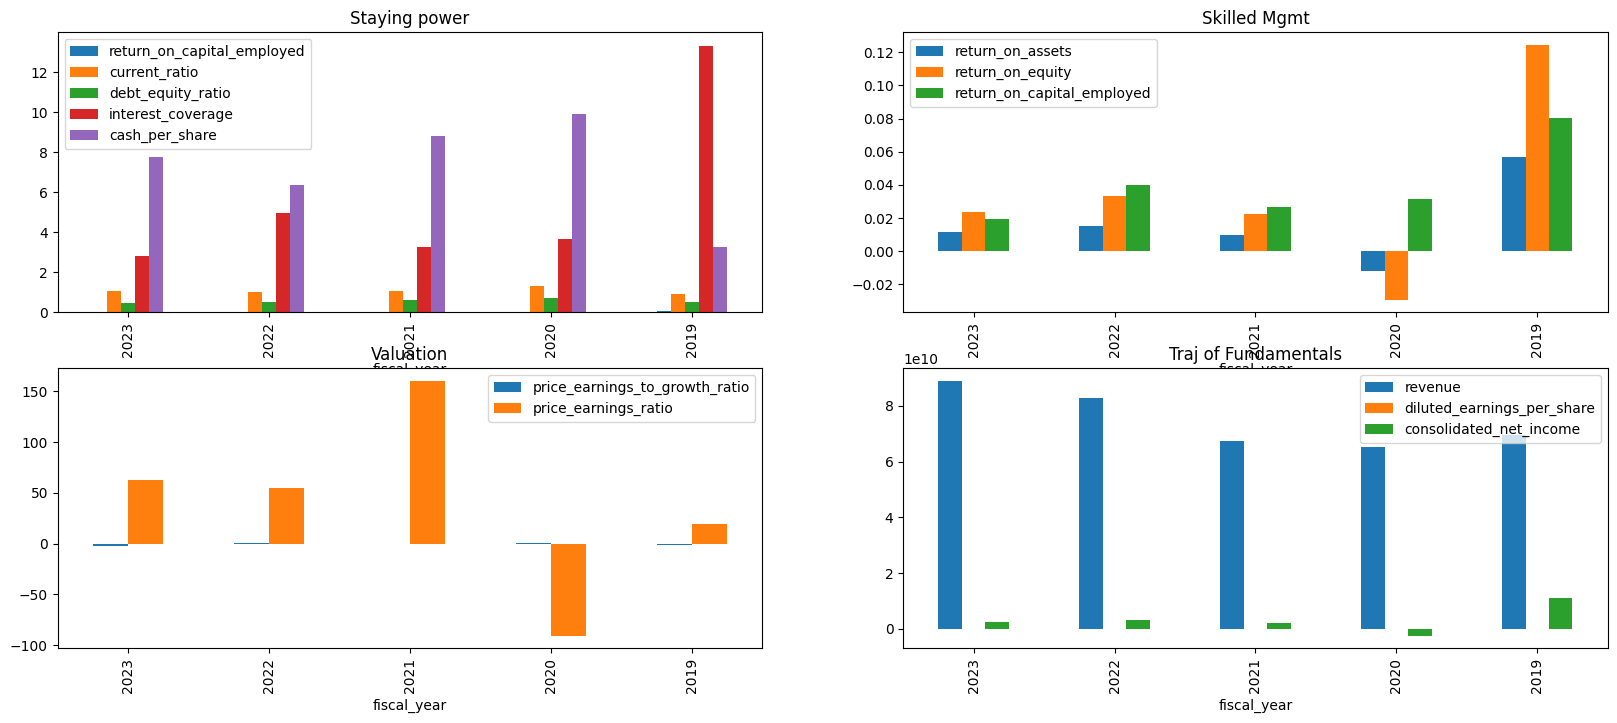

In [80]:
fig, axes = plt.subplots(2, 2)
print(axes)
staying_power_measures = ['fiscal_year'] + ['return_on_capital_employed', 'current_ratio', 'debt_equity_ratio', 'interest_coverage', 'cash_per_share']
skilled_mgmt_measures = ['fiscal_year'] + skilled_management_measures
valuation_measures = ['fiscal_year'] + valuation_measures
staying_power = annual_ratios[staying_power_measures].set_index('fiscal_year')
skilled_mgmt = annual_ratios[skilled_mgmt_measures].set_index('fiscal_year')
valuation = annual_ratios[valuation_measures].set_index('fiscal_year')
traj_fundamentals = annual_income[trajectory_of_fundamentals]
staying_power.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Staying power', ax=axes[0,0])
skilled_mgmt.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Skilled Mgmt', ax=axes[0,1])
valuation.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Valuation', ax=axes[1,0])
traj_fundamentals.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Traj of Fundamentals', ax=axes[1,1])

### Quarterly

In [67]:
annual_ratios

,period_ending,fiscal_period,fiscal_year,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,...,price_to_sales_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value
0,2023-09-30,FY,2023,1.052153,0.851408,0.455442,50.624873,8.966723,59.591597,-28.037569,...,1.666622,62.939422,30.255136,15.017170,15.017170,-2.474664,1.666622,NaN,11.838598,1.492384
1,2022-10-01,FY,2022,1.000860,0.834692,0.399512,55.825294,8.371471,64.196766,77.875829,...,2.077673,54.648413,161.077095,28.597215,28.597215,0.954179,2.077673,NaN,17.267279,1.808998
2,2021-10-02,FY,2021,1.083020,0.943656,0.513531,72.368729,7.619552,79.988281,93.638624,...,4.741080,160.217624,160.700935,57.415872,57.415872,-0.882832,4.741080,NaN,36.794201,3.609524
3,2020-10-03,FY,2020,1.323832,1.149992,0.672750,70.936869,9.380703,80.317572,75.039695,...,3.388548,-90.733170,61.615795,29.085114,29.085114,0.754791,3.388548,0.007163,24.222793,2.650903
4,2019-09-28,FY,2019,0.892231,0.663018,0.171885,81.221288,10.427849,91.649137,87.128502,...,3.093485,19.469311,124.401017,32.578529,32.578529,-0.950827,3.093485,0.013452,14.934382,2.421479


In [33]:
df = obb.equity.fundamental.income(symbol="AAPL", period="annual", limit=5)


In [26]:
[c for c in df.columns if 'income' in  c]

['interest_income',
 'operating_income',
 'operating_income_ratio',
 'total_other_income_expenses_net',
 'income_before_tax',
 'income_before_tax_ratio',
 'income_tax_expense',
 'consolidated_net_income',
 'net_income_ratio']

In [34]:
df.tail().T

,0,1,2,3,4
period_ending,2023-09-30,2022-09-24,2021-09-25,2020-09-26,2019-09-28
fiscal_period,FY,FY,FY,FY,FY
fiscal_year,2023,2022,2021,2020,2019
filing_date,2023-11-03,2022-10-28,2021-10-29,2020-10-30,2019-10-31
accepted_date,2023-11-02 18:08:27,2022-10-27 18:01:14,2021-10-28 18:04:28,2020-10-29 18:06:25,2019-10-30 18:12:36
reported_currency,USD,USD,USD,USD,USD
revenue,383285000000,394328000000,365817000000,274515000000,260174000000
cost_of_revenue,214137000000,223546000000,212981000000,169559000000,161782000000
gross_profit,169148000000,170782000000,152836000000,104956000000,98392000000
gross_profit_ratio,0.441311,0.433096,0.417794,0.382332,0.378178
